                                                Decision Tree using Drug.csv                                                                                    

In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn import tree
import os

In [83]:
df=pd.read_csv(r"C:\Users\Asus\Ethans\ml\decisiontree\drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [84]:
df.head()
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [85]:
df.BP.value_counts()

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [86]:
df.Cholesterol.value_counts()

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [87]:
df_final=df.copy()

In [88]:
df_final['Sex']=df['Sex'].map({'F':1,'M':0})   #encoding

In [89]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [90]:
df_final.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,HIGH,HIGH,25.355,drugY
1,47,0,LOW,HIGH,13.093,drugC
2,47,0,LOW,HIGH,10.114,drugC
3,28,1,NORMAL,HIGH,7.798,drugX
4,61,1,LOW,HIGH,18.043,drugY


In [91]:
df_final=pd.get_dummies(df_final,columns=['BP'])   #one hot encoding

In [92]:
df_final['Cholesterol']=df['Cholesterol'].map({'HIGH':1, 'NORMAL':0})

In [93]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [94]:
df_final.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL
0,23,1,1,25.355,drugY,True,False,False
1,47,0,1,13.093,drugC,False,True,False
2,47,0,1,10.114,drugC,False,True,False
3,28,1,1,7.798,drugX,False,False,True
4,61,1,1,18.043,drugY,False,True,False


In [95]:
new_order=['Age','Sex','Cholesterol','Na_to_K','BP_HIGH','BP_LOW','BP_NORMAL','Drug']

In [96]:
df_final=df_final[new_order]

In [97]:
X=df_final[['Age','Sex','Cholesterol','Na_to_K','BP_HIGH','BP_LOW','BP_NORMAL']]
y=df_final['Drug']

In [98]:
X_train, X_test, Y_train,Y_test=train_test_split(X,y, test_size=0.2, random_state=100)

In [99]:
X_test.shape

(40, 7)

In [100]:
X_train.shape

(160, 7)

In [101]:
clf_entropy=tree.DecisionTreeClassifier(criterion='entropy',random_state=100,max_depth=3,min_samples_leaf=3)

In [102]:
"""
What each parameter means:
criterion='entropy' The tree uses Entropy/Information Gain to decide the best split at each node
random_state=100 Ensures the model gives the same result everytime, making the output reproducible
max_dept=3 limits the tree to a maximum of 3 levels. This keeps the model simple and prevent overfitting.
min_samples_leaf=3 each leaf node contain atleast 3 samples. This avoids creating very small leaf nodes and helps the model generalize better

"""

"\nWhat each parameter means:\ncriterion='entropy' The tree uses Entropy/Information Gain to decide the best split at each node\nrandom_state=100 Ensures the model gives the same result everytime, making the output reproducible\nmax_dept=3 limits the tree to a maximum of 3 levels. This keeps the model simple and prevent overfitting.\nmin_samples_leaf=3 each leaf node contain atleast 3 samples. This avoids creating very small leaf nodes and helps the model generalize better\n\n"

In [103]:
clf_entropy.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=100)

In [104]:
y_pred_en=clf_entropy.predict(X_test)

In [105]:
y_pred_en

array(['drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX', 'drugX',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugB', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugB', 'drugY',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugX', 'drugY', 'drugA', 'drugY', 'drugB', 'drugX', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugB'], dtype=object)

In [106]:
print("accuracy is", accuracy_score(Y_test,y_pred_en)*100)
print("f1 score", f1_score(Y_test,y_pred_en,average='micro'))
# average='micro'
# used when you have multiple classes
# It counts total true positives, false positives, and false negative across all classes
# Best when all classes are equally important

accuracy is 95.0
f1 score 0.9500000000000001


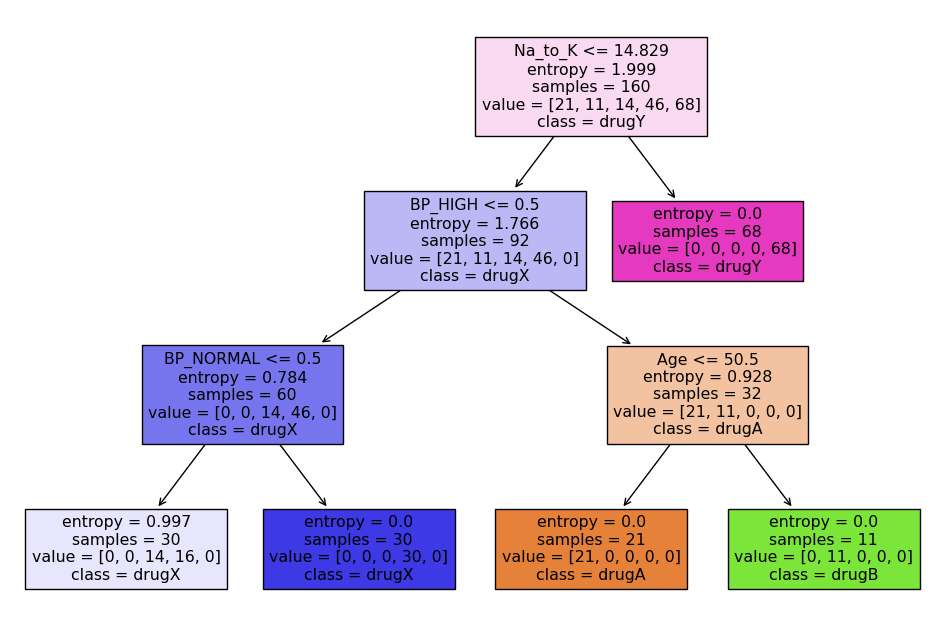

In [107]:
import matplotlib.pyplot as plt

#Set the size of decision tree plot
plt.figure(figsize=(12,8))

# Plot the trained Decision Tree
tree.plot_tree(
    clf_entropy,                        #our trained model
    filled=True,                        #fill nodes with different colors
    feature_names=X.columns,            #show feature names at each split
    class_names=clf_entropy.classes_    #show class labels in leaf nodes
)

plt.show()